In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm

# Basic EDA

In [3]:
def pdf2Text(filename):
    ''' load pdf and return the text'''
    text = ''
    # open the pdf file
    with pdfplumber.open(filename) as pdfObj:
        # loop over each page
        for page in pdfObj.pages:
            # get text from the page and concat
            text += page.extract_text()
    # return all texts
    return text

## Job Description

In [4]:
jd = pdf2Text('dataset/Job description.pdf')
print(jd)

Machine Learning Engineering
13585ABC
Knowledge and Innovation
What you’ll do
You will focus on researching, building, and designing self-running artificial intelligence (AI)
systems to automate predictive models. You are responsible to design and create the AI
algorithms capable of learning and making predictions that define machine learning (ML).
Experience and qualifications
● Bachelor's or Master's degree (mention the course as per requirement)
● 0-2 years of work experience providing analytics solutions in a commercial setting
Technical expertise
Must have
● Machine Learning, Clustering, Logistic Regression, Classification
● Different libraries such as SciKit Learn, NumPy, Pandas, Matplotlib, Seaborn
● Deep learning frameworks such as Tensorflow, Keras, PyTorch and application of Neural
Networks and models. CNN, RNN, GANs
● Familiar with Natural Language Processing and associated libraries like NLTK, SpaCy,
Beautiful Soup
● PySpark, Hadoop, and Big Data Pipelines
● Data science me

<br><b>Summary:</b>
* The job description pdf is of 2 pages.
* It has required work experience, education qualification and must have and nice to have skills mentioned.
* This is a typical job description for machine learning engineer role.

## Resumes

In [5]:
csvData = pd.read_csv('dataset/data.csv')

In [6]:
csvData.shape

(90, 2)

In [7]:
csvData.columns

Index(['CandidateID', 'Match Percentage'], dtype='object')

In [8]:
csvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CandidateID       90 non-null     object 
 1   Match Percentage  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [9]:
csvData.describe()

,Match Percentage
count,90.000000
mean,39.645333
std,16.032770
min,4.810000
25%,35.937500
50%,44.650000
75%,50.542500
max,69.210000


In [10]:
print(csvData.duplicated().sum())

0


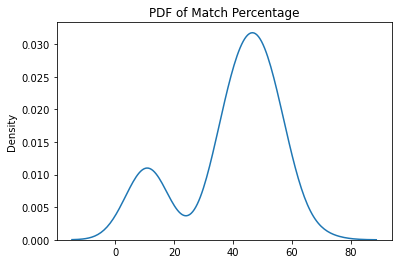

In [11]:
sns.kdeplot(csvData['Match Percentage'].values)
plt.title('PDF of Match Percentage')
plt.show()

In [12]:
csvData.head()

,CandidateID,Match Percentage
0,candidate_011,13.60
1,candidate_113,36.63
2,candidate_123,54.93
3,candidate_012,41.46
4,candidate_002,48.91


In [13]:
# view first five resumes
for sampleResume in csvData.CandidateID.head().values:
    # load resume pdf
    print(pdf2Text('dataset/resumes/'+sampleResume+'.pdf'))
    print('\n\n'+'*'*80+'\n\n')

L I A M   A N D R E W S
FRESHER
EXECUTIVE WORK EXPERIENCE
SUMMARY
DICTIS
Fresher with strong statistical and Intern Trainee, Jan 2020 to Apr 2020
analytic capabilities. Someone who
Responsible for performing and helping in decision
is driven by the passion for
making. 
problem solving. Though I am from
Civil Engineering background I
have always been fascinated with
data and how Machine Learning is
evolving with iit.
PERSONAL
SKILLS
Data Analyst, Data Mining, Data
Visualization, Machine Learning,
Linear Regression, Statistical
Modeling, Predictive Modeling, SQL
ACADEMIC PROFILE
Server, Oracle, Python.
PROJECTS
B.Tech(Civil) Garodia Institute of Technosciences,
Railway Signals Determiner using
2020 
relay weight system.
EXTRA-CURRICULARS
Data Preprocessing with Python
Data Visualization with Power BI


********************************************************************************


Ellie Mackey
FRESHER INTERN
Executive Profile Work Experience
Actively seeking job. An enthusiast, with a

In [14]:
# view last three resumes
for sampleResume in csvData.CandidateID.tail(3).values:
    # load resume pdf
    print(pdf2Text('dataset/resumes/'+sampleResume+'.pdf'))
    print('\n\n'+'*'*80+'\n\n')

N A D I Y A   A H M A D
DATA ANALYST
EXECUTIVE WORK EXPERIENCE
SUMMARY
Experience in using data to get HSBC Bank 
meaningful insights for the Data Analyst, Apr 2020 - till Date 
business use case. Skilled in
statistics, machine learning and Analyzing and Computing data of financial services
deep learning methods for both and intermittent fiat currency stabilities.
structured and unstructured.
PERSONAL
SKILLS
Statistical Analysis, C, OpenCV,
Deep Learning, Computer Vision,
R, Exploratory Data Analysis,
Linear Regression, Logistic ACADEMIC PROFILE
Regression, Risk Analyst, Machine
Learning, Financial Risk
Management.
B.Tech (IT) DBB University, Himachal, 2020
PROJECTS
Indicator to forecast non-
agricultural GDP of India a quarter
before.
EXTRA-CURRICULARS
Introduction to R Deep Learning
and Neural network


********************************************************************************


Stella Thatcher
ASSOCIATE MARKET ANALYST
Executive Profile Work Experience
I am a market research sp

<br><b>Summary:</b>
* We have 90 data points.
* We have the resumes and their corresponding match percentage.
* There are two columns in the csv file,
    * CandidateID : which same as the resume file name.
    * Match Percentage : it should be between 0 to 100.
* There is no missing data.
* There is no duplicate data.
* Minimum match percentage is 4.81
* Maximum match percentage is 69.21
* Mean of match percentage is 39.645
* Median of match percentage is 44.65
* Match percentage is a bimodal distribution
* There is no resume with Match percentage between 15 and 35.
* Most of the resumes have high match percentage.
* There are some spaced words like D A T A  S C I E N C E, which we need to take care.
* Also there are short forms mostly of education qualifications like B.Tech.

## Univariate and Bi-variate Analysis

In [15]:
resumeStrLen = []
resumeWordLen = []
# loop over all resumes
for sampleResume in csvData.CandidateID.values:
    # get character length of the resume
    resumeStrLen.append(len(pdf2Text('dataset/resumes/'+sampleResume+'.pdf')))
    # get word length of the resume
    resumeWordLen.append(len(pdf2Text('dataset/resumes/'+sampleResume+'.pdf').split()))

Min resume character length 529
Max resume character length 1543


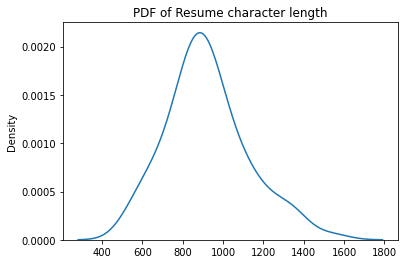

In [16]:
print('Min resume character length '+str(min(resumeStrLen)))
print('Max resume character length '+str(max(resumeStrLen)))
sns.kdeplot(resumeStrLen)
plt.title('PDF of Resume character length')
plt.show()

Min resume word length 73
Max resume word length 213


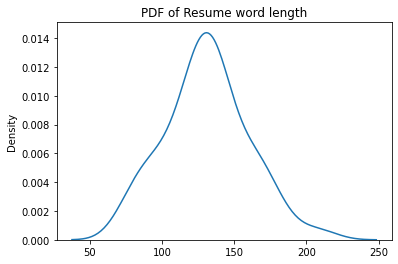

In [17]:
print('Min resume word length '+str(min(resumeWordLen)))
print('Max resume word length '+str(max(resumeWordLen)))
sns.kdeplot(resumeWordLen)
plt.title('PDF of Resume word length')
plt.show()

Spearman Rank Correlation Coefficient is 0.1970242627555634


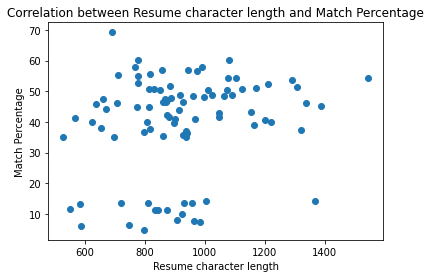

In [18]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(resumeStrLen, csvData['Match Percentage']).correlation)
plt.scatter(resumeStrLen, csvData['Match Percentage'])
plt.title('Correlation between Resume character length and Match Percentage')
plt.xlabel('Resume character length')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.2515450511098549


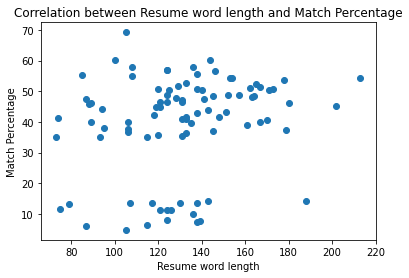

In [19]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(resumeWordLen, csvData['Match Percentage']).correlation)
plt.scatter(resumeWordLen, csvData['Match Percentage'])
plt.title('Correlation between Resume word length and Match Percentage')
plt.xlabel('Resume word length')
plt.ylabel('Match Percentage')
plt.show()

<br><b>Summary:</b>
* With the PDF of resumes's word length and character length, we can be certain that there are no irregularities in the resumes.
* There are minimum of 529 and maximum of 1543 characters in a resume.
* Character length is approximately gaussian distributed.
* There are minimum of 73 and maximum of 213 words in a resume.
* Word length is approximately gaussian distributed.
* There is very weak correlation between Resume character length and Match Percentage.
* There is very weak correlation between Resume word length and Match Percentage but it is better than character length.

# Data Cleaning

In [20]:
def concat(s):
    '''Concatenate words like "D A T A  S C I E N C E" to get "DATA SCIENCE"'''
    # add spaces at both end for better processing
    s = ' '+s+' '
    while True:
        # search if more than two alphabets are separated by space
        x = re.search(r"(\s[a-zA-Z]){2,}\s", s)
        if x==None:
            break
        # replace to get the concatenation
        s = s.replace(x.group(),' '+x.group().replace(' ','')+' ')
    return s

In [21]:
def preprocess_text(x, removeStopWords=False):
    # convert to lower case
    x = str(x).lower()
    # replace unusual quotes with '
    x = x.replace("′", "'").replace("’", "'")
    # replace new line with space
    x = x.replace("\n", " ")
    # concatenate
    x = concat(x)
    # remove links
    x = re.sub(r"http\S+", "", x)
    
    # convert education degrees like B.Tech or BTech to a specified form
    x = re.sub(r"\s+b[.]?[ ]?tech[(. /]{1}", " btech bachelor of technology ", x)
    x = re.sub(r"\s+m[.]?[ ]?tech[(. ]{1}", " mtech master of technology ", x)
    x = re.sub(r"\s+b[.]?[ ]?a[(. ]{1}", " ba bachelor of arts ", x)
    x = re.sub(r"\s+m[.]?[ ]?a[(. ]{1}", " ma master of arts ", x)
    x = re.sub(r"\s+b[.]?[ ]?sc[(. ]{1}", " bsc bachelor of science ", x)
    x = re.sub(r"\s+m[.]?[ ]?sc[(. ]{1}", " msc master of science ", x)
    x = re.sub(r"\s+b[.]?[ ]?e[(. ]{1}", " beng bachelor of engineering ", x)
    x = re.sub(r"\s+m[.]?[ ]?e[(. ]{1}", " meng master of engineering ", x)
    x = re.sub(r"\s+b[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " bca bachelor of computer applications ", x)
    x = re.sub(r"\s+m[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " mca master of computer applications ", x)
    x = re.sub(r"\s+b[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " bba bachelor of business administration ", x)
    x = re.sub(r"\s+m[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " mba master of business administration ", x)
    
    # convert skills with special symbols to words
    x = x.replace("c++", "cplusplus")
    x = x.replace("c#", "csharp")
    x = x.replace(".net", "dotnet")
    
    # replace non alpha numeric character with space
    x = re.sub('\W', ' ', x)
    
    # if remove stop words flag set then remove them
    z = []
    for i in x.split():
        if not (removeStopWords and i in stopwords.words('english')):
            # use lemmatizer to reduce the inflections
            lemmatizer = WordNetLemmatizer()
            i = lemmatizer.lemmatize(i)
            z.append(i)
    z = ' '.join(z)
    
    # strip white spaces
    z = z.strip()
    return z

<br><b>Summary:</b>
* I have converted everything to lower case.
* I have replaced unusual quotes like ’ with ' (quote).
* I have replaced the new lines with spaces.
* I have concatenated words like "D A T A  S C I E N C E" to get "DATA SCIENCE".
* I have also removed hyperlinks.
* I have converted education degrees like B.Tech or BTech to a specified form.
* I have converted skills with special symbols to words like C++ to cplusplus
* I have replaced non-alphanumeric characters with space.
* I have removed the stop words of english.
* I have removed inflections with word lemmatizer.

In [22]:
# preprocess job description
jd_processed = preprocess_text(jd, removeStopWords=True)
print(jd_processed)

machine learning engineering 13585abc knowledge innovation focus researching building designing self running artificial intelligence ai system automate predictive model responsible design create ai algorithm capable learning making prediction define machine learning ml experience qualification bachelor master degree mention course per requirement 0 2 year work experience providing analytics solution commercial setting technical expertise must machine learning clustering logistic regression classification different library scikit learn numpy panda matplotlib seaborn deep learning framework tensorflow kera pytorch application neural network model cnn rnn gans familiar natural language processing associated library like nltk spacy beautiful soup pyspark hadoop big data pipeline data science methodology exploratory data analysis feature engineering model selection deployment model scale model evaluation deploying nlp architecture computer vision model production considered plus transformer

In [23]:
# preprocess all resumes
resumes = []
for candidateID in csvData.CandidateID.values:
    # load resume pdf
    resume = pdf2Text('dataset/resumes/'+candidateID+'.pdf')
    # preprocess
    resume_processed = preprocess_text(resume, removeStopWords=True)
    resumes.append(resume_processed)

In [24]:
for i in range(5):
    print(resumes[i])
    print('\n\n'+'*'*80+'\n\n')

liam andrew fresher executive work experience summary dictis fresher strong statistical intern trainee jan 2020 apr 2020 analytic capability someone responsible performing helping decision driven passion making problem solving though civil engineering background always fascinated data machine learning evolving iit personal skill data analyst data mining data visualization machine learning linear regression statistical modeling predictive modeling sql academic profile server oracle python project btech bachelor technology civil garodia institute technosciences railway signal determiner using 2020 relay weight system extra curriculars data preprocessing python data visualization power bi


********************************************************************************


ellie mackey fresher intern executive profile work experience actively seeking job enthusiast bb house developer master degree electronics intern trainee nov 2019 feb 2020 telecommunication keen learn eagerly looking opp

In [25]:
for i in range(-3, 0):
    print(resumes[i])
    print('\n\n'+'*'*80+'\n\n')

nadiya ahmad data analyst executive work experience summary experience using data get hsbc bank meaningful insight data analyst apr 2020 till date business use case skilled statistic machine learning analyzing computing data financial service deep learning method intermittent fiat currency stability structured unstructured personal skill statistical analysis c opencv deep learning computer vision r exploratory data analysis linear regression logistic academic profile regression risk analyst machine learning financial risk management btech bachelor technology dbb university himachal 2020 project indicator forecast non agricultural gdp india quarter extra curriculars introduction r deep learning neural network


********************************************************************************


stella thatcher associate market analyst executive profile work experience market research specialist kripa infotech grasp machine learning looking associate market research analyst intern apr 2020

# Feature Extraction

In [26]:
# creating structured data frame
data = pd.DataFrame({'job_description': [jd_processed]*len(csvData), 'processed_resume': resumes, 'match_percentage': csvData['Match Percentage']})

In [27]:
print(data.head())

                                     job_description  \
0  machine learning engineering 13585abc knowledg...   
1  machine learning engineering 13585abc knowledg...   
2  machine learning engineering 13585abc knowledg...   
3  machine learning engineering 13585abc knowledg...   
4  machine learning engineering 13585abc knowledg...   

                                    processed_resume  match_percentage  
0  liam andrew fresher executive work experience ...             13.60  
1  ellie mackey fresher intern executive profile ...             36.63  
2  felix winston fresher fresher knowledge machin...             54.93  
3  jimmy gartner da ta manager professional profi...             41.46  
4  mason quadrado associate analyst certified dat...             48.91  


In [28]:
# list of reputed colleges in India
reputed_colleges = ['bits', 'iit', 'bhu', 'nit', 'vit', 'anna', 'jadavpur', 'tiet', 'thapar', 'iisc', 'srm', 'dtu', 'iiit']

# check if is from reputed college
def is_from_reputed_college(x):
    x = x.split()
    for i in reputed_colleges:
        if i in x:
            return 1
    return 0

In [29]:
def feature_extract(data):
    '''extract features'''
    # number of words in resume
    data['resume_word_num'] = data.processed_resume.apply(lambda x: len(x.split()))
    # number of unique words in job description and resumes 
    data['total_unique_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words in job description and resumes
    data['common_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).intersection(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by total number of unique words combined in both job description and resumes
    data['common_word_ratio'] = data['common_word_num'] / data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by minimum number of unique words between job description and resumes
    data['common_word_ratio_min'] = data['common_word_num'] / data.apply(lambda x: min(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1) 
    # number of common words divided by maximum number of unique words between job description and resumes
    data['common_word_ratio_max'] = data['common_word_num'] / data.apply(lambda x: max(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1) 
    
    # Fuzz WRatio
    data["fuzz_ratio"] = data.apply(lambda x: fuzz.WRatio(x.job_description, x.processed_resume), axis=1)
    # Fuzz partial ratio
    data["fuzz_partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token set ratio
    data["fuzz_token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token sort ratio
    data["fuzz_token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(x.job_description, x.processed_resume), axis=1)
    
    # is fresher
    data['is_fresher'] = data.processed_resume.apply(lambda x: int('fresher' in x.split()))
    # from reputed college
    data['from_reputed_college'] = data.processed_resume.apply(lambda x: is_from_reputed_college(x))
    
    # fill na fields with 0
    data.fillna(0, inplace=True)
    return data

In [30]:
# get features
data_feature = feature_extract(data)

In [31]:
data_feature.head()

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.067708,0.180556,0.097744,86,45,52,50,1,1
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.150000,0.364865,0.203008,86,47,57,52,1,0
2,machine learning engineering 13585abc knowledg...,felix winston fresher fresher knowledge machin...,54.93,93,184,18,0.097826,0.260870,0.135338,86,45,50,49,1,0
3,machine learning engineering 13585abc knowledg...,jimmy gartner da ta manager professional profi...,41.46,118,210,21,0.100000,0.214286,0.157895,52,45,55,51,0,0
4,machine learning engineering 13585abc knowledg...,mason quadrado associate analyst certified dat...,48.91,104,196,22,0.112245,0.258824,0.165414,86,46,55,53,0,0


In [32]:
print(data_feature.shape)

(90, 15)


<br><b>Summary:</b>
* I have created 12 new features.
* Since I have only one job description, I did not create few more features which could have been related to the job description and resume. Like difference of word length between job description and resume.
<br><br>I have created following features,
* <b>resume_word_num : </b> total number of words in resume
* <b>total_unique_word_num : </b> total number of unique words in job description and resumes 
* <b>common_word_num : </b> total number of common words in job description and resumes
* <b>common_word_ratio : </b> total number of common words divided by total number of unique words combined in both job description and resumes
* <b>common_word_ratio_min : </b> total number of common words divided by minimum number of unique words between job description and resumes
* <b>common_word_ratio_max : </b> total number of common words divided by maximum number of unique words between job description and resumes
* <b>fuzz_ratio : </b> fuzz.WRatio from fuzzy wuzzy library
* <b>fuzz_partial_ratio : </b> fuzz.partial_ratio from fuzzy wuzzy library
* <b>fuzz_token_set_ratio : </b> fuzz.token_set_ratio from fuzzy wuzzy library
* <b>fuzz_token_sort_ratio : </b> fuzz.token_sort_ratio from fuzzy wuzzy library
* <b>is_fresher : </b> wheather a candidate is fresher or experienced
* <b>from_reputed_college : </b> wheather a candidate is fresher from reputed college

## Univariate Analysis

Min = 63
Max = 168
Mean = 102.78888888888889


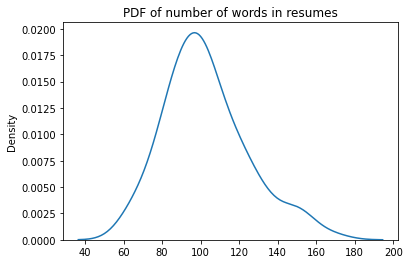

In [33]:
temp = np.array(data_feature['resume_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of words in resumes')
plt.show()

Min = 172
Max = 227
Mean = 194.06666666666666


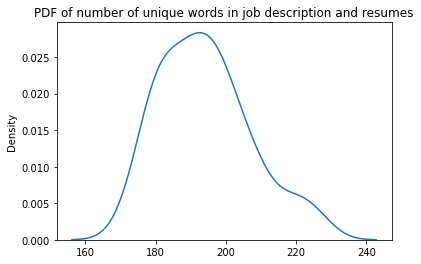

In [34]:
temp = np.array(data_feature['total_unique_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of unique words in job description and resumes')
plt.show()

Min = 9
Max = 36
Mean = 19.711111111111112


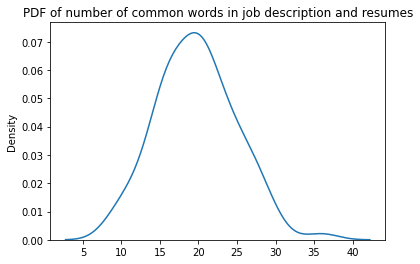

In [35]:
temp = np.array(data_feature['common_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words in job description and resumes')
plt.show()

Min = 0.045
Max = 0.1722488038277512
Mean = 0.10148416769605968


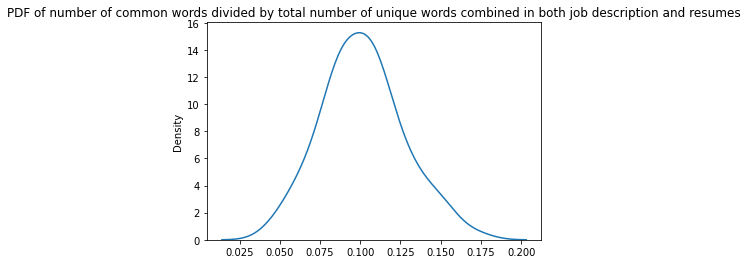

In [36]:
temp = np.array(data_feature['common_word_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by total number of unique words combined in both job description and resumes')
plt.show()

Min = 0.11842105263157894
Max = 0.4090909090909091
Mean = 0.24535325502109773


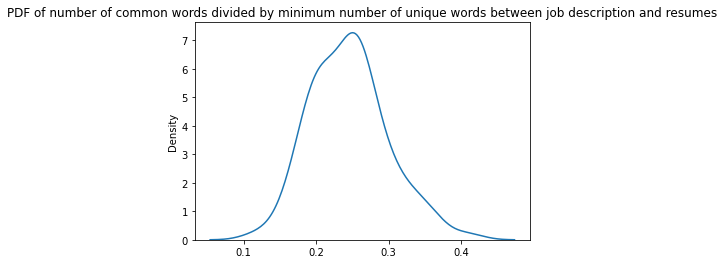

In [37]:
temp = np.array(data_feature['common_word_ratio_min'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by minimum number of unique words between job description and resumes')
plt.show()

Min = 0.06766917293233082
Max = 0.2706766917293233
Mean = 0.14820384294068506


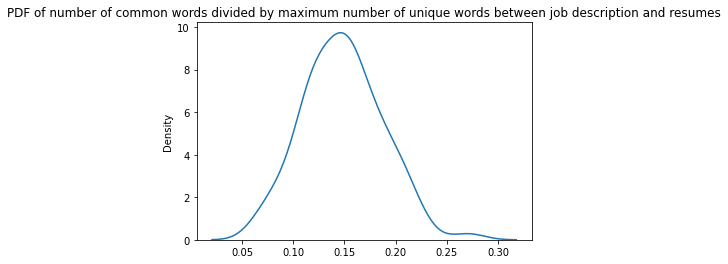

In [38]:
temp = np.array(data_feature['common_word_ratio_max'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by maximum number of unique words between job description and resumes')
plt.show()

Min = 48
Max = 86
Mean = 74.35555555555555


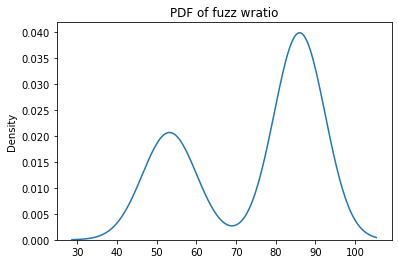

In [39]:
temp = np.array(data_feature['fuzz_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz wratio')
plt.show()

Min = 43
Max = 48
Mean = 44.955555555555556


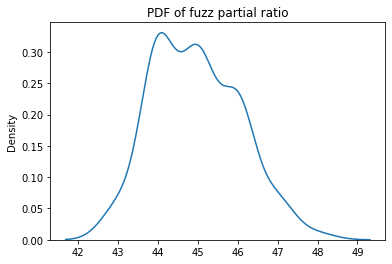

In [40]:
temp = np.array(data_feature['fuzz_partial_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz partial ratio')
plt.show()

Min = 41
Max = 61
Mean = 52.86666666666667


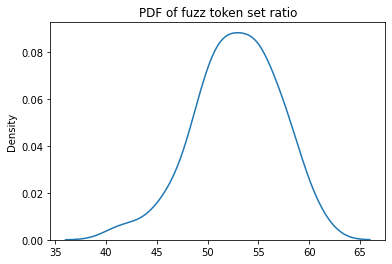

In [41]:
temp = np.array(data_feature['fuzz_token_set_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz token set ratio')
plt.show()

Min = 40
Max = 59
Mean = 50.87777777777778


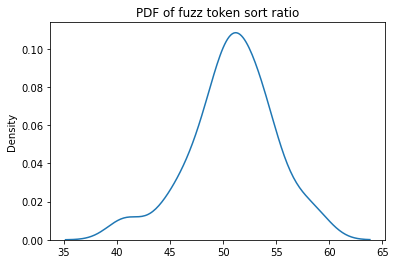

In [42]:
temp = np.array(data_feature['fuzz_token_sort_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz token sort ratio')
plt.show()

Number of freshers 28


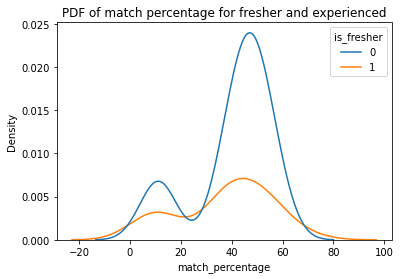

In [43]:
print('Number of freshers',data_feature.is_fresher.sum())
sns.kdeplot(data_feature.match_percentage, hue=data_feature.is_fresher)
plt.title('PDF of match percentage for fresher and experienced')
plt.show()

Number of candidates from reputed colleges 14


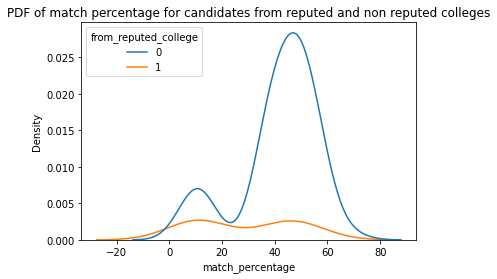

In [44]:
print('Number of candidates from reputed colleges',data_feature.from_reputed_college.sum())
sns.kdeplot(data_feature.match_percentage, hue=data_feature.from_reputed_college)
plt.title('PDF of match percentage for candidates from reputed and non reputed colleges')
plt.show()

<br><b>Summary:</b>
* resume_word_num is approximately log normally distributed with mean 102.789
* Minimum resume_word_num is 63 and maximum resume_word_num is 168
* total_unique_word_num is distributed widely with mean 194.067
* Minimum total_unique_word_num is 172 and maximum total_unique_word_num is 227
* common_word_num is approximately gaussian distributed with mean 19.71
* Minimum common_word_num is 9 and maximum common_word_num is 36
* common_word_ratio is approximately gaussian distributed with mean 0.10
* Minimum common_word_ratio is 0.045 and maximum common_word_ratio is 0.17
* common_word_ratio_min is approximately gaussian distributed with mean 0.245
* Minimum common_word_ratio_min is 0.118 and maximum common_word_ratio_min is 0.245
* common_word_ratio_max is approximately gaussian distributed with mean 0.148
* Minimum common_word_ratio_max is 0.068 and maximum common_word_ratio_max is 0.27
* fuzz_ratio has bi-modal distribution with mean 74.356
* Minimum fuzz_ratio is 48 and maximum fuzz_ratio is 86
* PDF of fuzz_partial_ratio is falling slowly and has mean 44.956
* Minimum fuzz_partial_ratio is 43 and maximum fuzz_partial_ratio is 48
* fuzz_token_set_ratio is approximately gaussian distributed with mean 52.867
* Minimum fuzz_token_set_ratio is 41 and maximum fuzz_token_set_ratio is 61
* fuzz_token_sort_ratio is approximately gaussian distributed with mean 50.878
* Minimum fuzz_token_sort_ratio is 40 and maximum fuzz_token_sort_ratio is 59
* There are about 28 freshers out of 90 candidates.
* For both freshers and experienced the pdf of match percentage peak at same points. 
* That means the match percentage is not affected by wheather a candidate is fresher or experienced.
* There are about 14 candidates are from reputed colleges out of 90 candidates.
* For both type of candidates the pdf of match percentage peak at same points. 
* That means the match percentage is not affected by wheather a candidate is from reputed or non reputed college.
* This can be because candidates from different domain might have also applied for the job. Otherwise, we could have seen some high match percentage for experienced and/or candidates from reputed colleges.

## Bi-variate Analysis

Spearman Rank Correlation Coefficient is 0.2847991191746271


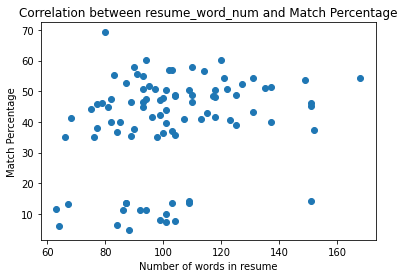

In [45]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['resume_word_num'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['resume_word_num'], data_feature['match_percentage'])
plt.title('Correlation between resume_word_num and Match Percentage')
plt.xlabel('Number of words in resume')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is -0.020010551262416004


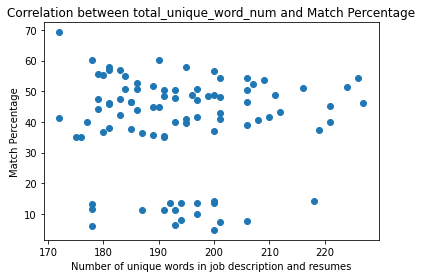

In [46]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['total_unique_word_num'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['total_unique_word_num'], data_feature['match_percentage'])
plt.title('Correlation between total_unique_word_num and Match Percentage')
plt.xlabel('Number of unique words in job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.5117751085504008


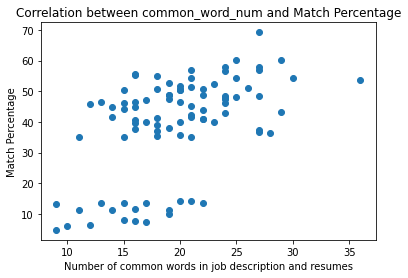

In [47]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_num'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['common_word_num'], data_feature['match_percentage'])
plt.title('Correlation between common_word_num and Match Percentage')
plt.xlabel('Number of common words in job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.5406008322666935


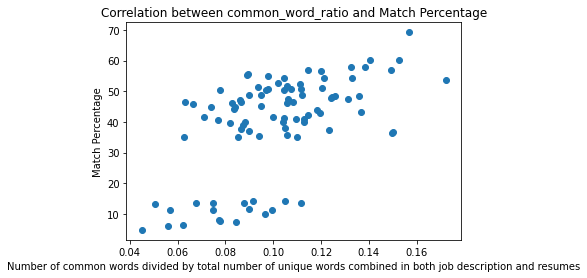

In [48]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['common_word_ratio'], data_feature['match_percentage'])
plt.title('Correlation between common_word_ratio and Match Percentage')
plt.xlabel('Number of common words divided by total number of unique words combined in both job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.4906379540225282


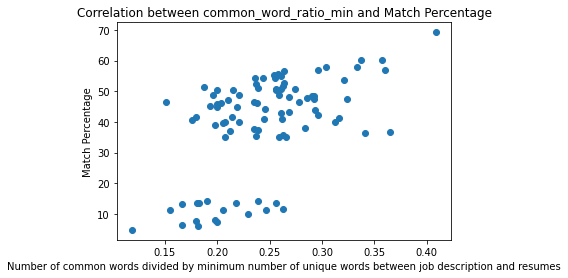

In [49]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_ratio_min'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['common_word_ratio_min'], data_feature['match_percentage'])
plt.title('Correlation between common_word_ratio_min and Match Percentage')
plt.xlabel('Number of common words divided by minimum number of unique words between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.5117751085504008


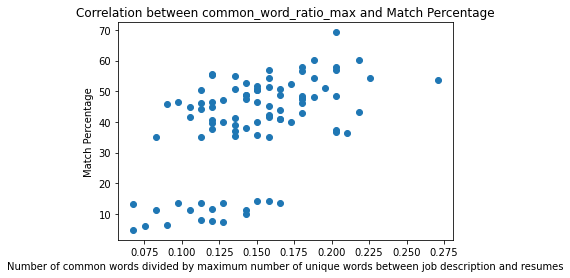

In [50]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_ratio_max'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['common_word_ratio_max'], data_feature['match_percentage'])
plt.title('Correlation between common_word_ratio_max and Match Percentage')
plt.xlabel('Number of common words divided by maximum number of unique words between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.9608566768482908


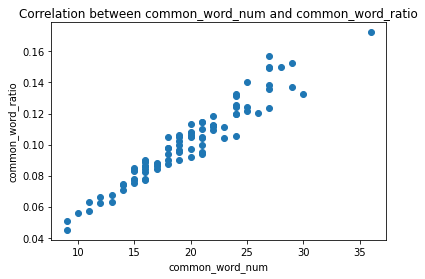

In [51]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_num'], data_feature['common_word_ratio']).correlation)
plt.scatter(data_feature['common_word_num'], data_feature['common_word_ratio'])
plt.title('Correlation between common_word_num and common_word_ratio')
plt.xlabel('common_word_num')
plt.ylabel('common_word_ratio')
plt.show()

Spearman Rank Correlation Coefficient is 0.685050847350704


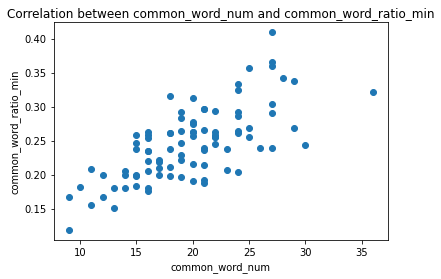

In [52]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_num'], data_feature['common_word_ratio_min']).correlation)
plt.scatter(data_feature['common_word_num'], data_feature['common_word_ratio_min'])
plt.title('Correlation between common_word_num and common_word_ratio_min')
plt.xlabel('common_word_num')
plt.ylabel('common_word_ratio_min')
plt.show()

Spearman Rank Correlation Coefficient is 1.0


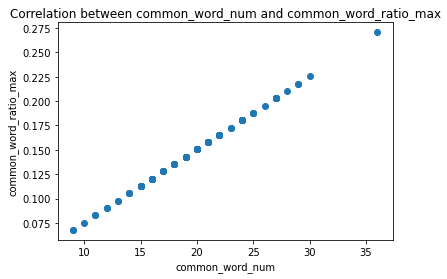

In [53]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['common_word_num'], data_feature['common_word_ratio_max']).correlation)
plt.scatter(data_feature['common_word_num'], data_feature['common_word_ratio_max'])
plt.title('Correlation between common_word_num and common_word_ratio_max')
plt.xlabel('common_word_num')
plt.ylabel('common_word_ratio_max')
plt.show()

In [54]:
common_word_columns = ['common_word_num', 'common_word_ratio', 'common_word_ratio_min', 'common_word_ratio_max']
for i in range(len(common_word_columns)):
    for j in range(i+1, len(common_word_columns)):
        print('SRCC between ', common_word_columns[i], ' and ', common_word_columns[j], ' is ', stats.spearmanr(data_feature[common_word_columns[i]], data_feature[common_word_columns[j]]).correlation)

SRCC between  common_word_num  and  common_word_ratio  is  0.9608566768482908
SRCC between  common_word_num  and  common_word_ratio_min  is  0.685050847350704
SRCC between  common_word_num  and  common_word_ratio_max  is  1.0
SRCC between  common_word_ratio  and  common_word_ratio_min  is  0.8491763615887576
SRCC between  common_word_ratio  and  common_word_ratio_max  is  0.9608566768482908
SRCC between  common_word_ratio_min  and  common_word_ratio_max  is  0.6850508473507041


Spearman Rank Correlation Coefficient is -0.19137325312831502


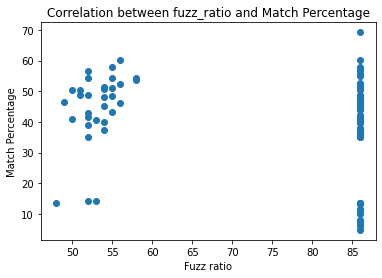

In [55]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_ratio and Match Percentage')
plt.xlabel('Fuzz ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.3442934680247399


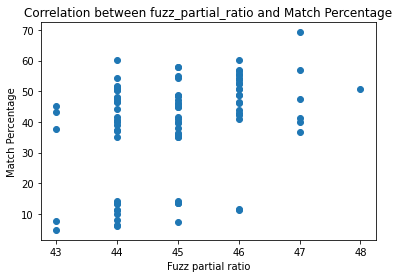

In [56]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_partial_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_partial_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_partial_ratio and Match Percentage')
plt.xlabel('Fuzz partial ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.3543603464075718


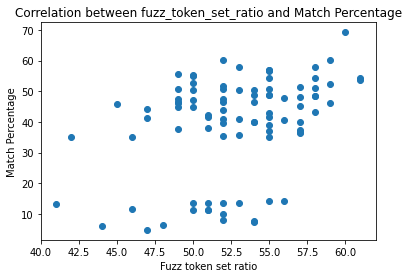

In [57]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_token_set_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_token_set_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_token_set_ratio and Match Percentage')
plt.xlabel('Fuzz token set ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.5007616457998243


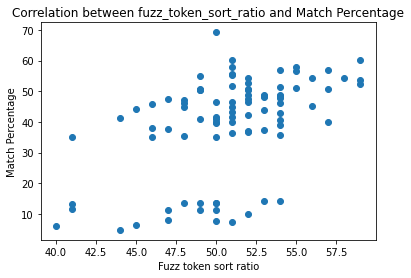

In [58]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_token_sort_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_token_sort_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_token_sort_ratio and Match Percentage')
plt.xlabel('Fuzz token sort ratio')
plt.ylabel('Match Percentage')
plt.show()

In [59]:
# remove common_word_ratio and common_word_ratio_max columns
data_feature.drop(columns=['common_word_ratio', 'common_word_ratio_max'], inplace=True)

<br><b>Summary:</b>
* There is very weak correlation between resume_word_num and Match Percentage. And the SRCC (Spearman Rank Correlation Coefficient) is 0.285
* The SRCC between total_unique_word_num and Match Percentage is -0.02. Since it is very close to zero we can say that there is not any correlation between total_unique_word_num and Match Percentage.
* There is some correlation between common_word_num and Match Percentage and the SRCC (Spearman Rank Correlation Coefficient) is 0.512
* The SRCC between common_word_ratio and Match Percentage is 0.541 which is a good.
* The SRCC between common_word_ratio_min and Match Percentage is 0.491
* The SRCC between common_word_ratio_max and Match Percentage is 0.512
* The SRCC between fuzz_ratio and Match Percentage is -0.19. There isn't much correlation. But if we ignore the fuzz ratios above 80 then we can see a good correlation.
* The SRCC between fuzz_partial_ratio and Match Percentage is 0.344 which is again a very weak correlation.
* The SRCC between fuzz_token_set_ratio and Match Percentage is also very small and is 0.354.
* The SRCC between fuzz_token_sort_ratio and Match Percentage is 0.501, which is good enough.
* The features related to common words have good correlation with the output.
* But the common word features are also correlated with each other.
* Specially the common_word_num, common_word_ratio and common_word_ratio_max have very strong correlation.
* So I have removed common_word_ratio and common_word_ratio_max columns.
* The fuzzy wuzzy features except fuzz_token_sort_ratio does not show any promising correlation.
* So we have 10 features.

# Feature Encoding

## Binary BoW

In [60]:
# binary bag of words with unigram, bigram and trigram
# also it has minimum document frequency of 4 and maximum document frequncy of 99%
vectorizer = CountVectorizer(ngram_range=(1,3), min_df=4, max_df=.99, binary=True)

In [61]:
# created text corpus to get the vocabulary
vocab_text = np.unique(np.append(data_feature.processed_resume.values, data_feature.job_description.values))

In [62]:
# fit vocab_text to create the vocabulary
vectorizer.fit(vocab_text)

CountVectorizer(binary=True, max_df=0.99, min_df=4, ngram_range=(1, 3))

In [63]:
# vocabulary size
print(len(vectorizer.vocabulary_))

716


In [64]:
bow_vocab = np.array(list(vectorizer.vocabulary_.keys()))

In [65]:
# save bow_vocab to file
with open('bow_vocab.npy', 'wb') as f:
    np.save(f, bow_vocab, allow_pickle=True)

In [66]:
# transform all resumes to get bow
bow_resume = vectorizer.transform(data_feature.processed_resume.values).toarray()

In [67]:
print(bow_resume.shape)

(90, 716)


In [68]:
# save bow_resume to file
with open('bow_resume.npy', 'wb') as f:
    np.save(f, bow_resume, allow_pickle=True)

In [69]:
# transform all jd to get bow
bow_jd = vectorizer.transform(data_feature.job_description.values).toarray()

In [70]:
print(bow_jd.shape)

(90, 716)


In [71]:
# save bow_jd to file
with open('bow_jd.npy', 'wb') as f:
    np.save(f, bow_jd, allow_pickle=True)

In [72]:
# Get cosine similarity and euclidean distance between two vectors
def cosine_euclidean(u, v):
    return np.array([np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)), np.linalg.norm(u - v)])

In [73]:
# process all rows to get similarities and distances
cosine_euclidean_data = np.array([cosine_euclidean(bow_jd[i], bow_resume[i]) for i in range(len(bow_resume))])

In [74]:
# add new features to the dataframe
data_feature[["cosine_similarity", "euclidean_distance"]] = cosine_euclidean_data

In [75]:
print(data_feature.head())

                                     job_description  \
0  machine learning engineering 13585abc knowledg...   
1  machine learning engineering 13585abc knowledg...   
2  machine learning engineering 13585abc knowledg...   
3  machine learning engineering 13585abc knowledg...   
4  machine learning engineering 13585abc knowledg...   

                                    processed_resume  match_percentage  \
0  liam andrew fresher executive work experience ...             13.60   
1  ellie mackey fresher intern executive profile ...             36.63   
2  felix winston fresher fresher knowledge machin...             54.93   
3  jimmy gartner da ta manager professional profi...             41.46   
4  mason quadrado associate analyst certified dat...             48.91   

   resume_word_num  total_unique_word_num  common_word_num  \
0               87                    192               13   
1               84                    180               27   
2               93              

In [76]:
print(data_feature.shape)

(90, 15)


In [77]:
# save data_feature
data_feature.to_csv('data_feature.csv', index=False)

<br><b>Summary:</b>
* First feature encoding I have done is with CountVectorizer. 
* That means the encoding will be large and sparse vector representation.
* I have encoded with binary bag of words. That means the value will be 0 or 1 based on the presence of the word.
* I have used uni-gram, bi-gram and tri-gram to get some sequnce information as well.
* And I have used both job description and resume text to create the vocabulary.
* The minimum document frequency is 4. So it help in removing some non useful words like names.
* The maximum document frequency is 99%. That means word which are very frequent will be ignored.
* The vocab size is 716. So we will get 716 dimensional output for both job description and resumes.
* We have created two new features cosine_similarity and euclidean_distance.
* <b>cosine_similarity : </b> It represents cosine similarity score between word embeddings (based on BoW) of job description and resume.
* <b>euclidean_distance : </b> It represents euclidean distance between word embeddings (based on BoW) of job description and resume.
* Now we have total of <b>12</b> extracted features.
* And the total feature dimension is 12+716+716 = <b>1444</b>

### Univariate and Bi-variate Analysis

Min = 0.1168811455530461
Max = 0.35488487356360665
Mean = 0.23045408231637762


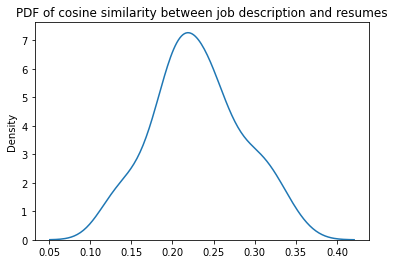

In [78]:
temp = np.array(data_feature['cosine_similarity'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of cosine similarity between job description and resumes')
plt.show()

Min = 11.532562594670797
Max = 13.92838827718412
Mean = 12.724456776569335


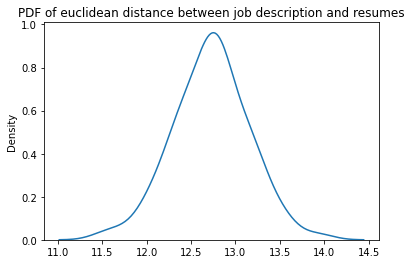

In [79]:
temp = np.array(data_feature['euclidean_distance'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of euclidean distance between job description and resumes')
plt.show()

Spearman Rank Correlation Coefficient is 0.5059535324060717


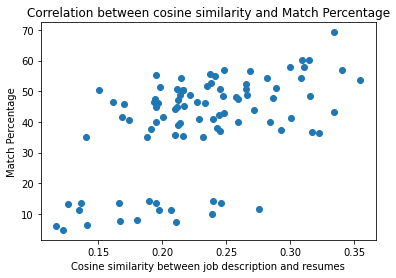

In [80]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['cosine_similarity'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['cosine_similarity'], data_feature['match_percentage'])
plt.title('Correlation between cosine similarity and Match Percentage')
plt.xlabel('Cosine similarity between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is -0.13486586157368685


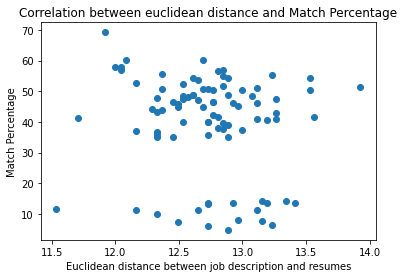

In [81]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['euclidean_distance'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['euclidean_distance'], data_feature['match_percentage'])
plt.title('Correlation between euclidean distance and Match Percentage')
plt.xlabel('Euclidean distance between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

<br><b>Summary:</b>
* cosine_similarity is approximately gaussian distributed with mean 0.230
* Minimum cosine_similarity is 0.117 and maximum cosine_similarity is 0.355
* PDF of euclidean_distance is falling very sharply on both side and has mean of 12.724
* Minimum euclidean_distance is 11.532 and maximum euclidean_distance is 13.928
* The SRCC between cosine_similarity and Match Percentage is 0.506, which is good.
* But the SRCC between euclidean_distance and Match Percentage is only -0.135. So we can say that there is no correlation.

## Average Word2Vec

In [82]:
# create new variable to store new embedding data
data_feature2 = data_feature.drop(columns=['cosine_similarity', 'euclidean_distance'])

In [83]:
# load word2vec model
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [84]:
# get all available words
w2v_words = list(w2v_model.key_to_index)

In [85]:
def getAverageWord2Vec(sentence):
    ''' get Average Word2Vec given a sentence'''
    # initialize sentence_vector to zeros
    sentence_vector = np.zeros(300)
    # count words in sentence
    count_words = 0
    # loop over each word
    for word in sentence.split():
        # if there is a vector for given word
        if word in w2v_words:
            # get the vector
            vector = w2v_model[word]
            # add the vectors
            sentence_vector = sentence_vector + vector
            # increment count
            count_words = count_words + 1
    if count_words != 0:
        # if the word count is not zero then divide by it to get the average
        sentence_vector /= count_words
    # return the avg word2vec
    return sentence_vector

In [86]:
# get average word2vec for resumes
w2v_resume = []
# used tqdm to print progress bar
for sentence in tqdm(data_feature2.processed_resume.values):
    # get and append sentence vectors
    w2v_resume.append(getAverageWord2Vec(sentence))
# convert to numpy array
w2v_resume = np.array(w2v_resume)

100%|███████████████████████████████████████████| 90/90 [00:37<00:00,  2.37it/s]


In [87]:
print(w2v_resume.shape)

(90, 300)


In [88]:
# save w2v_resume to file
with open('w2v_resume.npy', 'wb') as f:
    np.save(f, w2v_resume, allow_pickle=True)

In [89]:
# get average word2vec for job description
w2v_jd = []
for sentence in tqdm(data_feature2.job_description.values):
    # get and append sentence vectors
    w2v_jd.append(getAverageWord2Vec(sentence))
# convert to numpy array
w2v_jd = np.array(w2v_jd)

100%|███████████████████████████████████████████| 90/90 [01:11<00:00,  1.25it/s]


In [90]:
print(w2v_jd.shape)

(90, 300)


In [92]:
# save w2v_jd to file
with open('w2v_jd.npy', 'wb') as f:
    np.save(f, w2v_jd, allow_pickle=True)

In [93]:
# process all rows to get similarities and distances
cosine_euclidean_data = np.array([cosine_euclidean(w2v_jd[i], w2v_resume[i]) for i in range(len(w2v_resume))])

In [94]:
# add new features to the dataframe
data_feature2[["cosine_similarity", "euclidean_distance"]] = cosine_euclidean_data

In [95]:
print(data_feature2.head())

                                     job_description  \
0  machine learning engineering 13585abc knowledg...   
1  machine learning engineering 13585abc knowledg...   
2  machine learning engineering 13585abc knowledg...   
3  machine learning engineering 13585abc knowledg...   
4  machine learning engineering 13585abc knowledg...   

                                    processed_resume  match_percentage  \
0  liam andrew fresher executive work experience ...             13.60   
1  ellie mackey fresher intern executive profile ...             36.63   
2  felix winston fresher fresher knowledge machin...             54.93   
3  jimmy gartner da ta manager professional profi...             41.46   
4  mason quadrado associate analyst certified dat...             48.91   

   resume_word_num  total_unique_word_num  common_word_num  \
0               87                    192               13   
1               84                    180               27   
2               93              

In [96]:
print(data_feature2.shape)

(90, 15)


In [98]:
# save data_feature2
data_feature2.to_csv('data_feature2.csv', index=False)

<br><b>Summary:</b>
* Second feature encoding I have done is with Word2Vec. 
* That means the encoding will be smaller and dense vector representation.
* I have used pretrained google news model to get 300 dimensional representation.
* I did not have much data that's why I did not train my own word2vec model.
* After getting the word embeddings, I have summed them up and divided by the count to get average word2vec representation.
* We have created two new features cosine_similarity and euclidean_distance.
* <b>cosine_similarity : </b> It represents cosine similarity score between word embeddings (based on w2v) of job description and resume.
* <b>euclidean_distance : </b> It represents euclidean distance between word embeddings (based on w2v) of job description and resume.
* Now again we have total of <b>12</b> extracted features.
* And the total feature dimension is 12+300+300 = <b>612</b>

### Univariate and Bi-variate Analysis

Min = 0.1168811455530461
Max = 0.35488487356360665
Mean = 0.23045408231637762


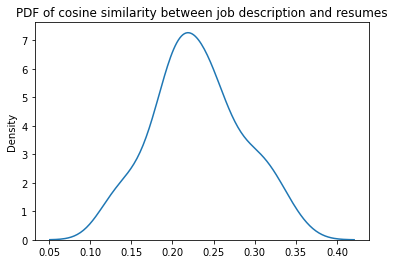

In [99]:
temp = np.array(data_feature['cosine_similarity'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of cosine similarity between job description and resumes')
plt.show()

Min = 11.532562594670797
Max = 13.92838827718412
Mean = 12.724456776569335


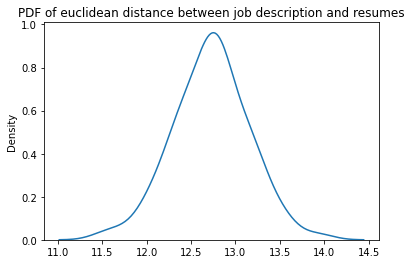

In [100]:
temp = np.array(data_feature['euclidean_distance'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of euclidean distance between job description and resumes')
plt.show()

Spearman Rank Correlation Coefficient is 0.5059535324060717


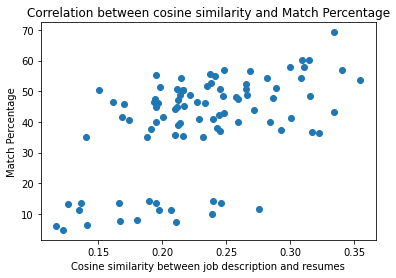

In [101]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['cosine_similarity'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['cosine_similarity'], data_feature['match_percentage'])
plt.title('Correlation between cosine similarity and Match Percentage')
plt.xlabel('Cosine similarity between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is -0.13486586157368685


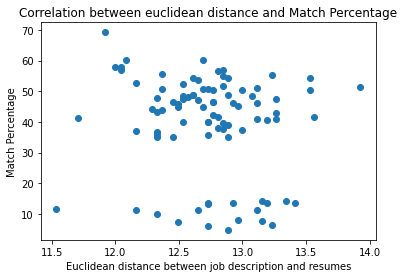

In [102]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['euclidean_distance'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['euclidean_distance'], data_feature['match_percentage'])
plt.title('Correlation between euclidean distance and Match Percentage')
plt.xlabel('Euclidean distance between job description and resumes')
plt.ylabel('Match Percentage')
plt.show()

<br><b>Summary:</b>
* cosine_similarity is approximately gaussian distributed with mean 0.171
* Minimum cosine_similarity is 0.083 and maximum cosine_similarity is 0.291
* PDF of euclidean_distance is falling very sharply on both side and has mean of 15.578
* Minimum euclidean_distance is 14.036 and maximum euclidean_distance is 17.493
* The SRCC between cosine_similarity and Match Percentage is 0.495, which is good.
* But the SRCC between euclidean_distance and Match Percentage is only -0.03. So we can say that there is no correlation.
* cosine_similarity and euclidean_distance features are very similar for both feature encodings.